In [65]:
# Celda de configuración
# Elegir qué métodos ejecutar
CORRER_ECUACIONES_NORMALES = True
CORRER_SVD = True
CORRER_QR = True

ALEATORIZAR_MUESTRAS = True   # mezclar antes de recortar columnas

# Semilla para reproducibilidad en el recorte
# Sirve para que, si ALEATORIZAR_MUESTRAS=True, la selección aleatoria de columnas sea siempre la misma (resultados reproducibles).
SEMILLA_REDUCCION = 287238


# TP2 - Benchmark de algoritmos

Este notebook:
- Carga los embeddings de `cats_and_dogs` y sus etiquetas (train/val)
- Entrena un clasificador lineal `W` con dos métodos:
  - Ecuaciones Normales (factorización de Cholesky)
  - Pseudo-inversa vía SVD
- Compara tiempos de entrenamiento y accuracy en validación



In [66]:
from pathlib import Path
import time
import numpy as np
import alc
import matplotlib.pyplot as plt

# Directorio del dataset (relativo al repo)
RUTA_DATASET = Path('template-alumnos/dataset/cats_and_dogs')
assert RUTA_DATASET.exists(), f'No se encontró el dataset en {RUTA_DATASET.resolve()}'


In [67]:
# Recarga de módulos de la librería de la cátedra
import importlib


# Luego recargar el paquete para refrescar los símbolos
moduloALC = importlib.reload(alc)

# Reasignar alias usado en el notebook
alc = moduloALC


In [68]:

# Carga de datos usando cargarDataset del main (con posible reducción)
X_train, Y_train, X_val, Y_val = alc.cargarDataset(str(RUTA_DATASET))

def reducir_tamanio(X_a_reducir, Y_a_reducir, max_columnas_train, semilla_reducir=SEMILLA_REDUCCION):
    if X_a_reducir.shape[1] >= max_columnas_train:
        indices = np.arange(X_a_reducir.shape[1])
        if ALEATORIZAR_MUESTRAS:
            rng = np.random.default_rng(semilla_reducir)
            rng.shuffle(indices)
        indices = indices[:max_columnas_train]
        X_train_reducido = X_train[:, indices]
        Y_train_reducido = Y_train[:, indices]
        return X_train_reducido, Y_train_reducido
    
    return X_a_reducir, Y_a_reducir


In [69]:
def exactitud_desde_puntajes(W: np.ndarray, X: np.ndarray, Y_verdadera: np.ndarray) -> float:
    puntajes = alc.productoMatricial(W, X)
    y_pred = np.argmax(puntajes, axis=0)
    y_true = np.argmax(Y_verdadera, axis=0)
    return float(np.mean(y_pred == y_true))


def obtener_resultados(X_reducido, Y_reducido):
    resultados = {}

    # Ecuaciones Normales (Cholesky)
    if CORRER_ECUACIONES_NORMALES:
        inicio = time.perf_counter()
        W_normal = alc.pinvEcuacionesNormales(X_reducido, None, Y_reducido)
        Tiempo_entrenamiento_normal = time.perf_counter() - inicio

        acc_train_normal = exactitud_desde_puntajes(W_normal, X_reducido, Y_reducido)
        acc_val_normal = exactitud_desde_puntajes(W_normal, X_val, Y_val)

        resultados['ecuaciones_normales'] = {
            'tiempo_entrenamiento_s': Tiempo_entrenamiento_normal,
            'exactitud_train': acc_train_normal,
            'exactitud_val': acc_val_normal,
        }

    # SVD
    if CORRER_SVD:
        inicio = time.perf_counter()
        U, S, V = alc.svd_reducida(X_reducido)
        W_svd = alc.pinvSVD(U, S, V, Y_reducido)
        Tiempo_entrenamiento_svd = time.perf_counter() - inicio

        acc_train_svd = exactitud_desde_puntajes(W_svd, X_reducido, Y_reducido)
        acc_val_svd = exactitud_desde_puntajes(W_svd, X_val, Y_val)

        resultados['SVD'] = {
            'tiempo_entrenamiento_s': Tiempo_entrenamiento_svd,
            'exactitud_train': acc_train_svd,
            'exactitud_val': acc_val_svd,
        }

    # QR
    if CORRER_QR:
        # Gram-Schmidt
        Q_gs, R_gs = alc.QR_con_GS_MatRectangular(alc.traspuesta(X_reducido))
        inicio = time.perf_counter()
        W_qr_gs = alc.pinvGramSchmidt(Q_gs, R_gs, Y_reducido)
        Tiempo_entrenamiento_qr_gs = time.perf_counter() - inicio
        acc_train_qr_gs = exactitud_desde_puntajes(W_qr_gs, X_reducido, Y_reducido)
        acc_val_qr_gs = exactitud_desde_puntajes(W_qr_gs, X_val, Y_val)
        resultados['QR_GS'] = {
            'tiempo_entrenamiento_s': Tiempo_entrenamiento_qr_gs,
            'exactitud_train': acc_train_qr_gs,
            'exactitud_val': acc_val_qr_gs,
        }

        # Householder
        Q_hh, R_hh = alc.QR_con_HH(alc.traspuesta(X_reducido))
        inicio = time.perf_counter()
        W_qr_hh = alc.pinvHouseHolder(Q_hh, R_hh, Y_reducido)
        Tiempo_entrenamiento_qr_hh = time.perf_counter() - inicio
        acc_train_qr_hh = exactitud_desde_puntajes(W_qr_hh, X_reducido, Y_reducido)
        acc_val_qr_hh = exactitud_desde_puntajes(W_qr_hh, X_val, Y_val)
        resultados['QR_HH'] = {
            'tiempo_entrenamiento_s': Tiempo_entrenamiento_qr_hh,
            'exactitud_train': acc_train_qr_hh,
            'exactitud_val': acc_val_qr_hh,
        }

    return resultados


Resultados para matriz reducida a 50 columnas:
ante nashe
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del pro

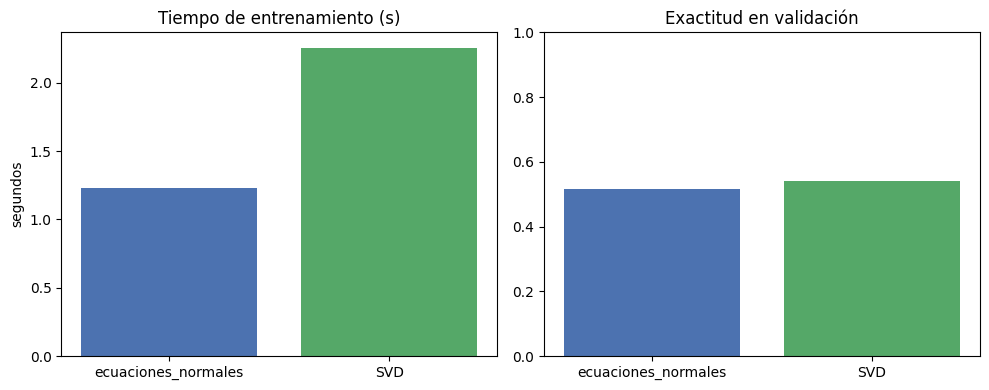

Resultados para matriz reducida a 250 columnas:
ante nashe
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del producto de vectores
antes del producto de vectores
despues del pr

In [ ]:
# Mostrar resultados y gráficos de comparación
def mostrar_resultados(resultados):
    print('Resultados:')
    for metodo, valores in resultados.items():
        print(f"\nMétodo: {metodo}")
        print(f"  tiempo entrenamiento (s): {valores['tiempo_entrenamiento_s']:.4f}")
        print(f"  exactitud train: {valores['exactitud_train']:.4f}")
        print(f"  exactitud val  : {valores['exactitud_val']:.4f}")

    metodos = list(resultados.keys())
    tiempos = [resultados[m]['tiempo_entrenamiento_s'] for m in metodos]
    exactitudes = [resultados[m]['exactitud_val'] for m in metodos]

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.bar(metodos, tiempos, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#937860', '#DA8BC3', '#7C4D7D', '#C496B5', '#A4A4A4', '#B56576'])
    plt.title('Tiempo de entrenamiento (s)')
    plt.ylabel('segundos')

    plt.subplot(1,2,2)
    plt.bar(metodos, exactitudes, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#937860', '#DA8BC3', '#7C4D7D', '#C496B5', '#A4A4A4', '#B56576'])
    plt.title('Exactitud en validación')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()
    
    
X_50, Y_50 = reducir_tamanio(X_train, Y_train, 50, 32432)
X_250, Y_250 = reducir_tamanio(X_train, Y_train, 250, 12353)
X_500, Y_500 = reducir_tamanio(X_train, Y_train, 500, 2321124)
X_1000, Y_1000 = reducir_tamanio(X_train, Y_train, 1000, 2321124)
X_2000, Y_2000 = reducir_tamanio(X_train, Y_train, 2000, 2321124)

CORRER_QR = False # necesita n < p

print("Resultados para matriz reducida a 50 columnas:")
mostrar_resultados(obtener_resultados(X_50, Y_50))

print("Resultados para matriz reducida a 250 columnas:")
mostrar_resultados(obtener_resultados(X_250, Y_250))

print("Resultados para matriz reducida a 500 columnas:")
mostrar_resultados(obtener_resultados(X_500, Y_500))

CORRER_QR = True

print("Resultados para matriz reducida a 2000 columnas:")
mostrar_resultados(obtener_resultados(X_2000, Y_2000))
